k means clustering algorithm implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=1000,n_features = 2,centers=3,random_state=23)

In [4]:
X.shape

(1000, 2)

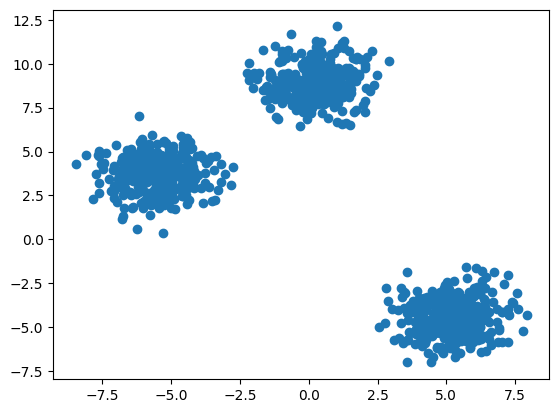

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [11]:
from sklearn.cluster import KMeans

In [13]:
##manual process
##elbow method to select the value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
wcss

[35763.35659961976,
 8297.202114173548,
 1394.6687381999263,
 1218.6512067705894,
 1067.0730765533535,
 914.2161432055043,
 817.5299054813188,
 716.8588515897911,
 616.9284418116927,
 569.0632973712288]

<function matplotlib.pyplot.show(close=None, block=None)>

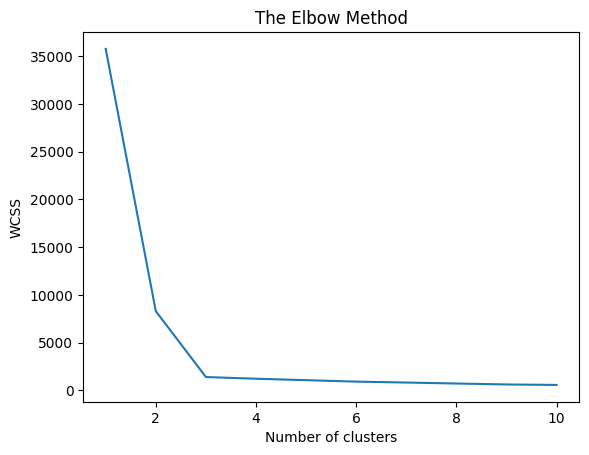

In [15]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [17]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [19]:
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
y_test = kmeans.predict(X_test)

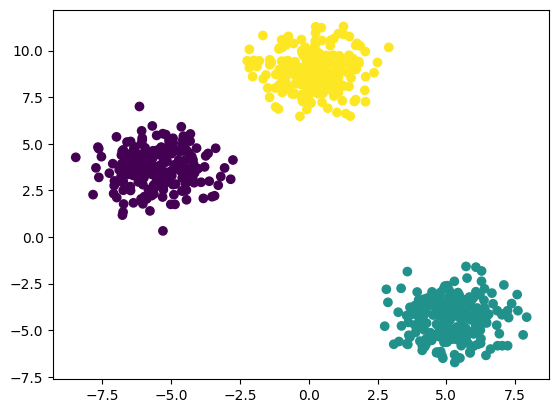

In [23]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

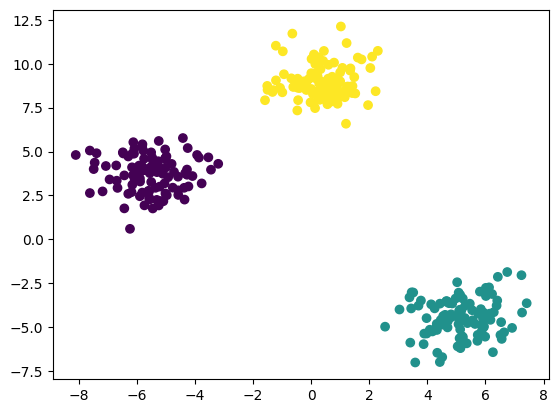

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

In [26]:
#to automate all there is a library knee locator
!pip install kneed

In [27]:
from kneed import KneeLocator

In [30]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing') #if in the graph of wcss vs cluster the values increases then we will use concave otherwise convex
kl.elbow

3

In [31]:
#performance metrics
#Silhoutte score
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [33]:
silhouette_coefficients

[0.7252547694122655,
 0.8027214370116031,
 0.6325977932069853,
 0.47203490521286534,
 0.32780374731401823,
 0.3343615839635479,
 0.3338931327620768,
 0.33894830522409797,
 0.34947225223110184]

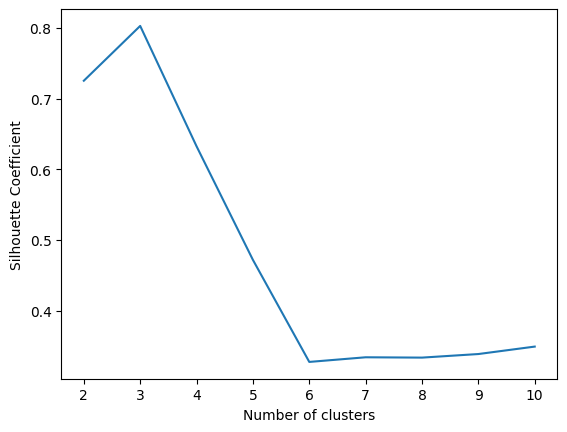

In [35]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()